# Computations as graphs

Computations can be mapped to graphs (think of code execution graphs)

![](graph/img/api_intro-03.png)

- Input nodes (geometry, state, basis set)
- Compute nodes (HF, FCI, orbital optimization, etc.)

### Implementing directed acyclic graphs in python

![](graph/img/graph.pdf)

See

- https://www.codingame.com/playgrounds/9487/deep-learning-from-scratch---theory-and-implementation/computational-graphs

- https://tomroth.com.au/compgraph1/

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from graph.tools import add_method

## A simple node class

In [65]:
class Graph():
    def __init__(self):
        self._nodes = []

    def as_default(self):
        global _default_graph
        _default_graph = self   
        return self
    
    def __len__(self):
        return len(self._nodes)

class Node():
    def __init__(self,input_nodes=None):
        self._val = None # uninitialized node
        self._input_nodes = [] if input_nodes is None else input_nodes
        self._id = len(_default_graph)
        _default_graph._nodes.append(self)

    def __repr__(self):
        return f'{self.__class__.__name__}{self._id} = {self._val}'
    
    @property
    def input_nodes(self):
        return self._input_nodes

In [69]:
Graph().as_default()
n = Node()
n1 = Node([n])
print(n,n1)
print(n1.input_nodes)

Node0 = None Node1 = None
[Node0 = None]


## Let's add a `draw()` function

In [70]:
@add_method(Node)
def draw(self,level=0,graph=None,parent_node=None):
    if level == 0:
        graph = nx.Graph()

    graph.add_node(repr(self))
    if parent_node is not None:
        graph.add_edge(parent_node,repr(self))

    for input in self.input_nodes:
        input.draw(level+1,graph,repr(self))

    if level == 0:
        from pylab import rcParams
        rcParams['figure.figsize'] = 7, 5
        nx.draw_spring(graph,with_labels=True,node_shape="s", linewidths=40,node_color='lightblue',node_size=1500,width=5, edge_color="skyblue", style="solid")
        plt.axis('off')
        axis = plt.gca()
        axis.set_xlim([1.2*x for x in axis.get_xlim()])
        axis.set_ylim([1.2*y for y in axis.get_ylim()])
        plt.show()

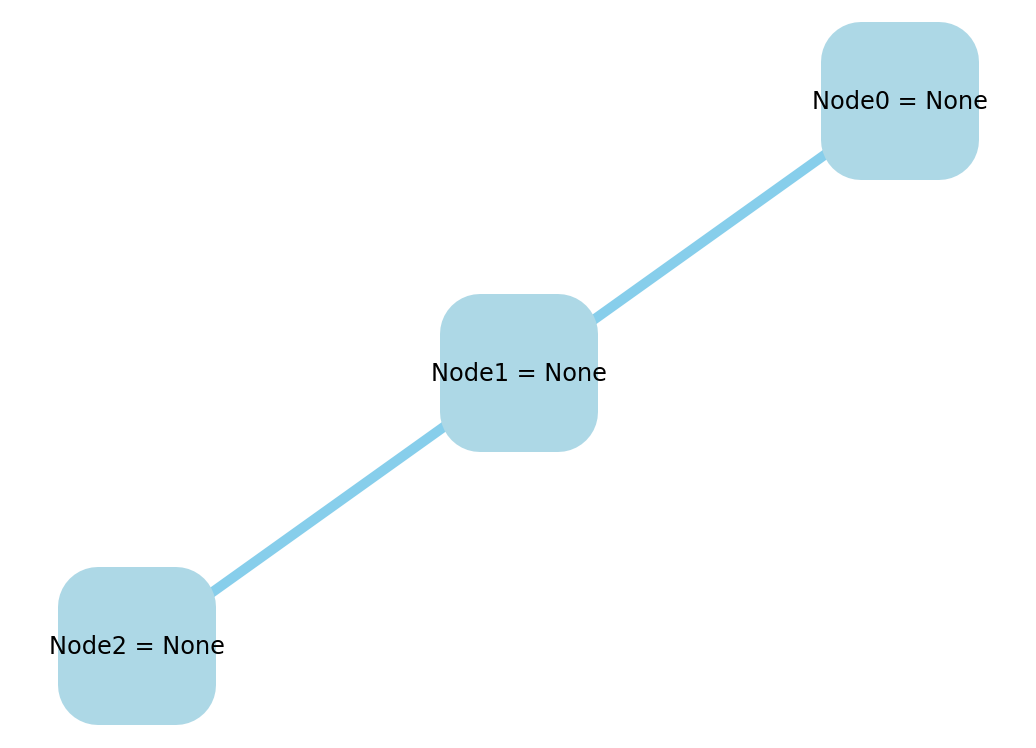

In [71]:
g = Graph().as_default()
n0 = Node()
n1 = Node([n0])
n2 = Node([n1])
n2.draw()

## Making graphs runnable

In [74]:
@add_method(Node)
def run(self):
        print(f'Calling run() on {repr(self)}')
        self._val = self._run()
        print(f'Done executing run() on {repr(self)}')   
        return self._val
        
@add_method(Node)        
def _run(self):
    print(f'Base nodes do not run any code')
    return None
    
@add_method(Node)
def val(self):
    if self._val is None:
        self.run()
    return self._val

In [75]:
n = Node()
n.run()

Calling run() on Node4 = None
Base nodes do not run any code
Done executing run() on Node4 = None


## Implementing algebra with graphs

(1 + 2) * 7

In [76]:
class Variable(Node):
    def __init__(self, value):
        super().__init__(None)
        self._val = value

    def _run(self):
        return self._val
    
class Add(Node):
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def _run(self):
        return self.input_nodes[0].val() + self.input_nodes[1].val()
    
class Multiply(Node):
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def _run(self):
        return self.input_nodes[0].val() * self.input_nodes[1].val()

In [79]:
g = Graph().as_default()
v1 = Variable(1)
v2 = Variable(2)
v3 = Variable(7)
a = Add(v1,v2)
m = Multiply(a,v3)

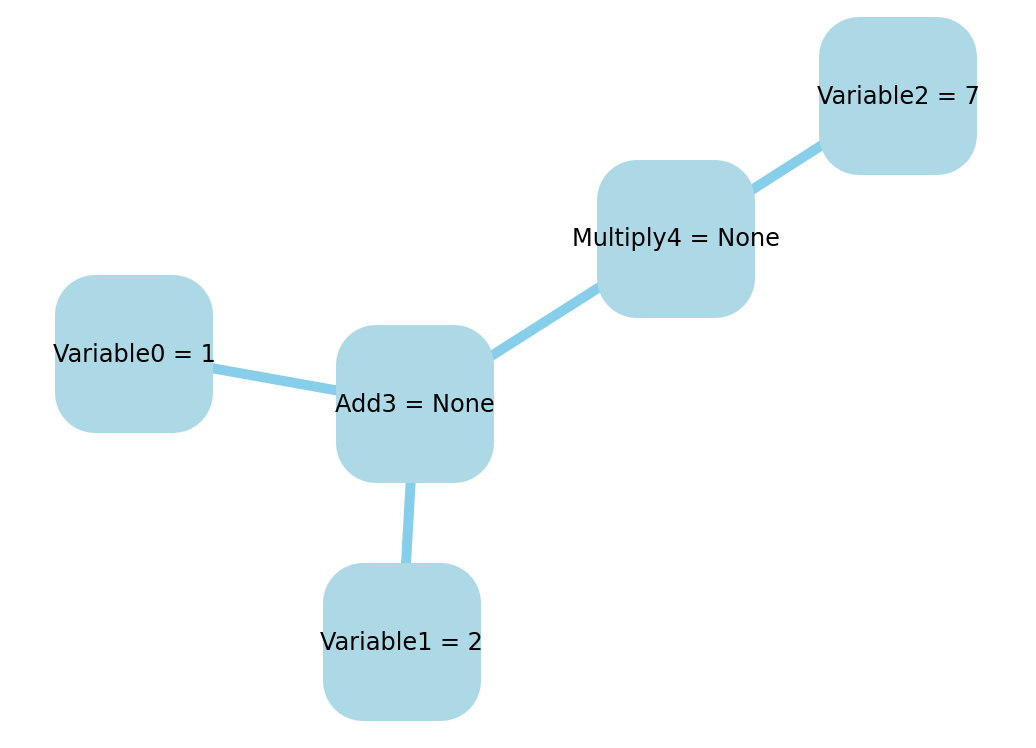

In [80]:
m.draw()

## Let's write a quantum chemistry code

In [81]:
class Integrals(Node):
    def __init__(self, input_nodes=None):
        super().__init__(input_nodes)        
        print("Setting up the integrals class")
        
class HF(Node):
    def __init__(self, input_nodes=None):
        super().__init__(input_nodes)        
        print("Setting up the HF class")        

Setting up the integrals class
Setting up the HF class


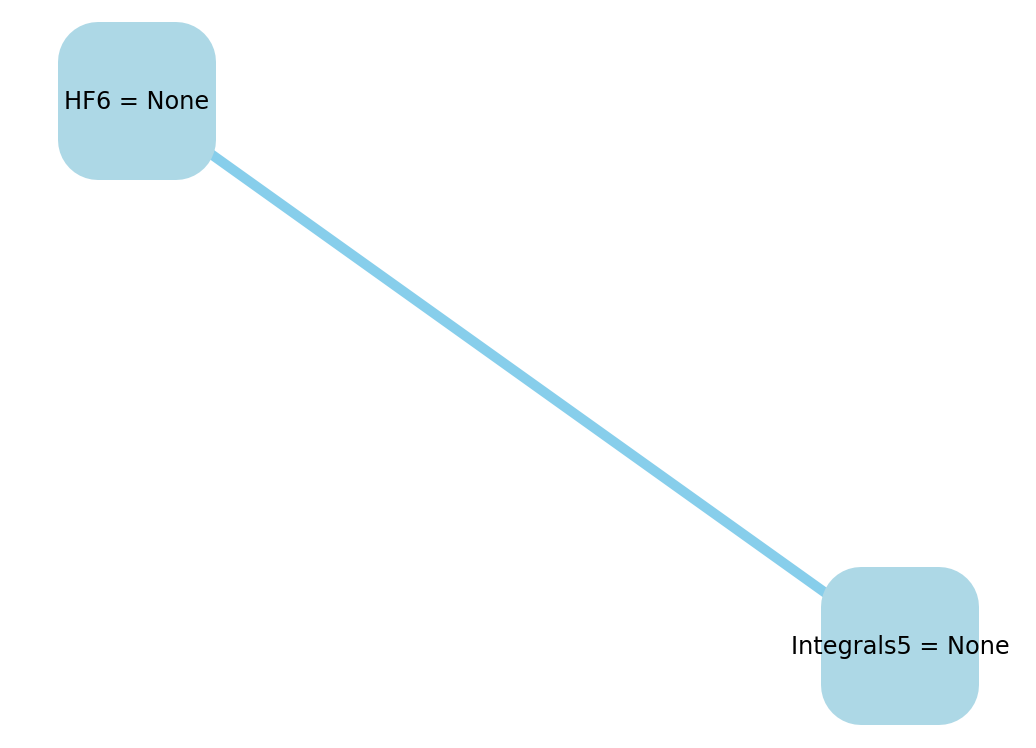

In [82]:
def energy():
    ints = Integrals()
    hf = HF([ints])
    hf.run()

In [83]:
hf.run()

Calling run() on HF6 = None
Base nodes do not run any code
Done executing run() on HF6 = None
